In [ ]:
#Name : Vishal Chalia

#Business Context
The strategic concern of most organizations is employee retention. The turnover rate may lead to disruption to the work, demotivation of the team, and cause serious expenses associated with the recuritment, introdcution, and development of the new workers. The contemporary organizations gather plenty of HR data: demographics, job characteristics, performance measures, and compensation, as well as work-life balance data, but these insights are usually rarely applied to predictions.

When using machine learning to analysis employee-level data, organizations may gain deeper insight into what drives emplyees to leave their roles and procavtively address this issue by retaining potential talent. Evidence-based workforce planning with data-based approach will help to enhance job engagement and minimize unwarrented financial wastage.

#Introduction
Being a newly hired data scientist, I have been assigned with designing and implemnt an end-to-end machine learning pipeline to solve one of the existing HR problems an employee attrition rate.

The given data is of employees from HR information systems, with datasets including age, tenure, department, job role, salary, overtime, performance ratings, etc.

#Data Source:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

#Problem Statement
Voluntary resignation by employees increase the cost of hiring new personnel training them, expertise, and even low productivity. This project will aim at coming up with a predictive model that approximates the chances of an employee quitting the organzation.

- Create a binary classification model by using Attrition (Yes/NO) as a target variable.
- Determine the strongest predictors of attrition in order to make HR decisions.
- Make sure that the model is understanble, precise and repeatable, so that they can be incorporated into retention mechanisms or reporting instruments.

An effective solution will also be able to provide the HR teams with an early warning of vulnerable employees and evidence-based recommendations to improve job satisfaction and retention.

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

Basic Python libraries have been loaded to process and manipulate data, visualize it, and perform machine learning. Pandas and Numpy were installed to manipulate tabular data, matplotlib and seaborn were used to plot, and scikit-learn was used to develope models, preprocess data and evaluate it. Consolidating all the imports would mean that the notebook would be reproducible and easy to install.

#Loading Dataset

In [ ]:
df_org = pd.read_csv('/content/drive/MyDrive/AI Datasets/(Final)_HR-Employee-Attrition.csv')

Loaded the dataset for further exploration.

#Exploring Data

In [ ]:
#checking data
print(df_org.shape)
df_org.head()

#checking missig values
df_org.isnull().sum()

(1470, 35)


,0
Age,15
Attrition,12
BusinessTravel,25
DailyRate,21
Department,15
DistanceFromHome,20
Education,22
EducationField,14
EmployeeCount,16
EmployeeNumber,20


The uploaded dataset has 1,470 records of employees and 35 features, loaded succesfully. It consists of demographhic values, compensation variables and job realted variables and the target is the Attrition.

#Data Cleaning

In [ ]:
df = df_org.copy()

num_cols = df.select_dtypes(include= np.number).columns
cat_cols = df.select_dtypes(exclude= np.number).columns

num_imputer = SimpleImputer(strategy= 'median')
cat_imputer = SimpleImputer(strategy= 'most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

#attributing 1 to yes and 0 to no
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


df.drop_duplicates(inplace= True)

df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Through the intial inspection, it wa revealed that there are some missing values in both numeric and nominal features. Impuited values were done using median (numeric) and most frequent (categorical) values. No duplicates were found and the target column was reduced to binary values (Yes=1, No0).

#EDA (Plots & Summary)

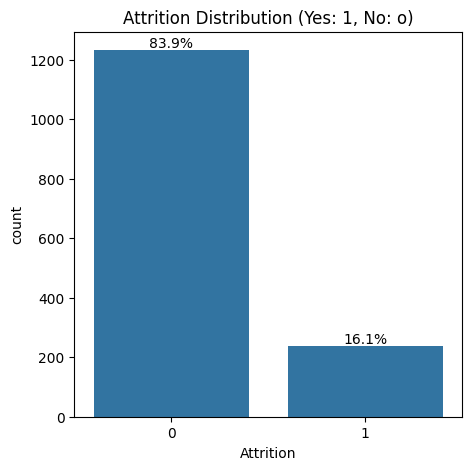

In [ ]:
#target distribution
plt.figure(figsize= (5, 5))
pl = sns.countplot(x='Attrition', data=df)
[pl.text(p.get_x() + p.get_width()/2,
         p.get_height(),
         f'{p.get_height()/len(df)*100:.1f}%',
         ha='center', va='bottom') for p in pl.patches]
plt.title('Attrition Distribution (Yes: 1, No: o)')
plt.show()

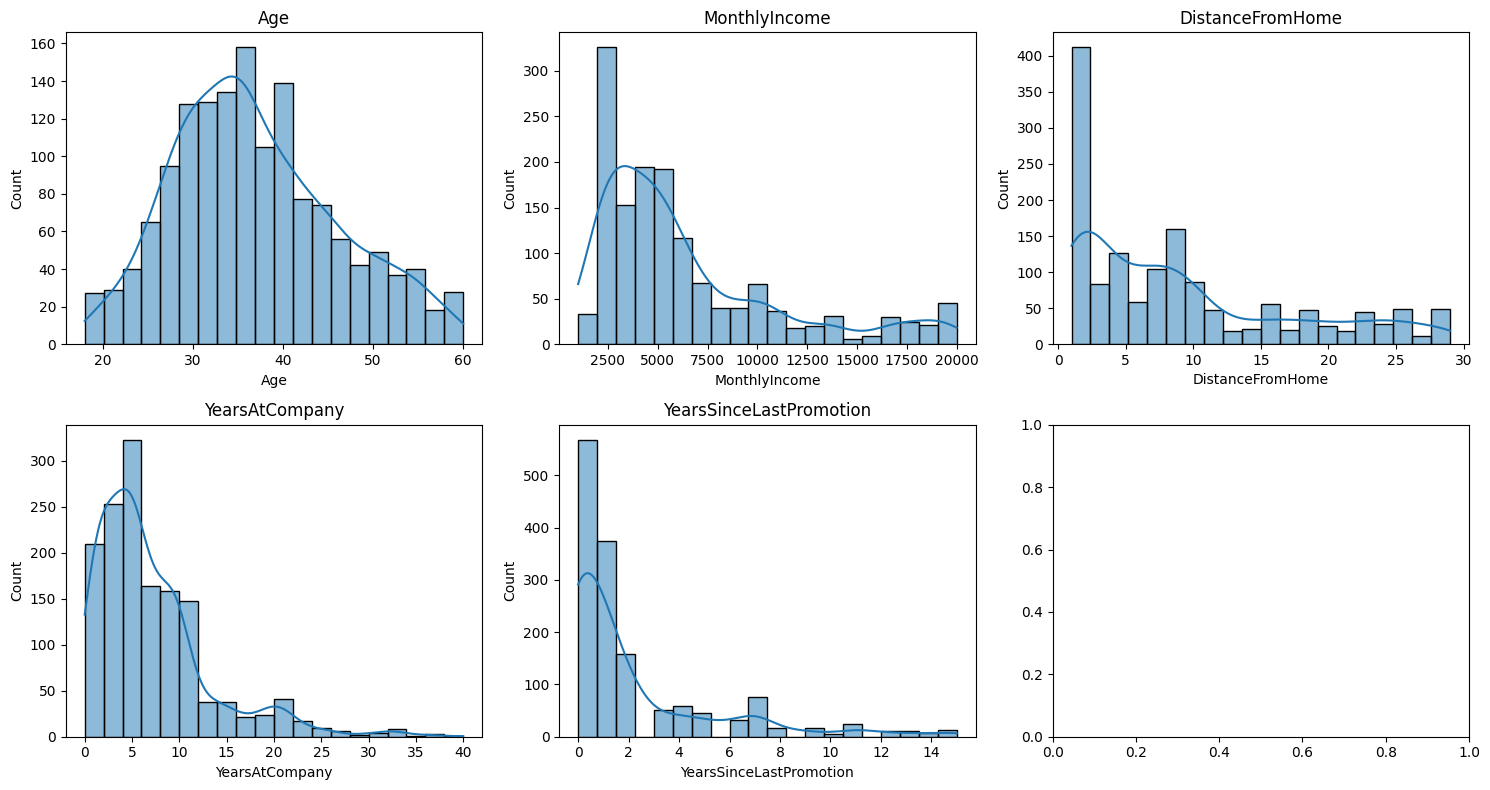

In [ ]:
#key numeric variables

key = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany',
       'YearsSinceLastPromotion']

fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize= (15, 8))
axes = axes.flatten()

for i, col in enumerate(key):
  sns.histplot(df[col], bins = 20, kde = True, ax= axes[i])
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

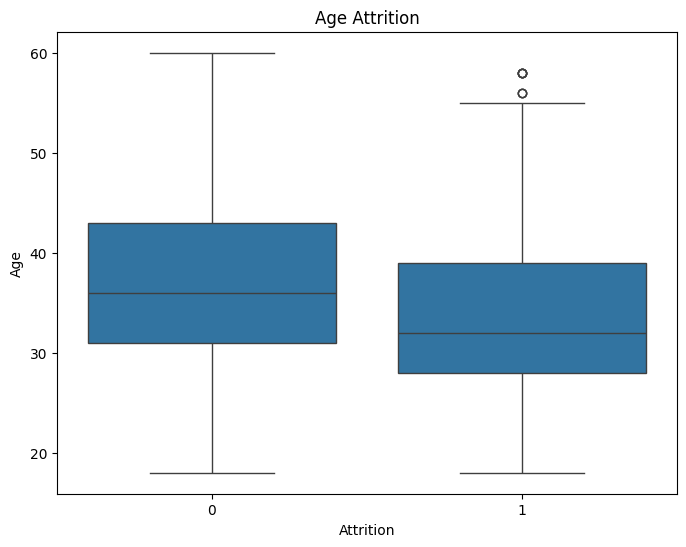

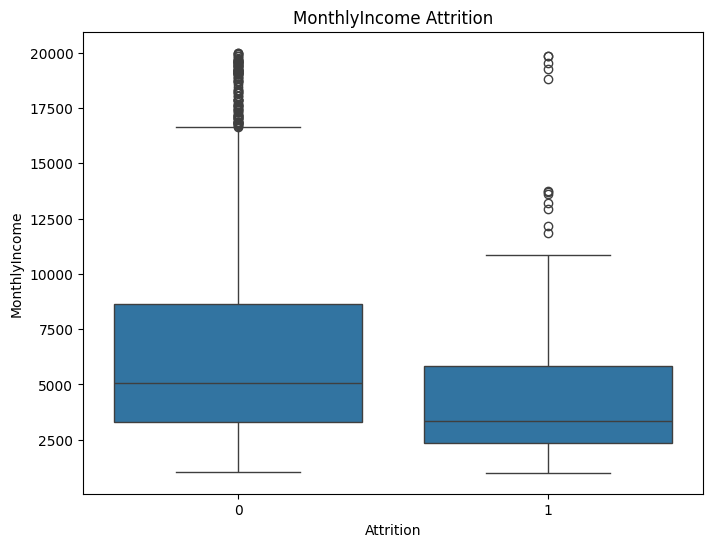

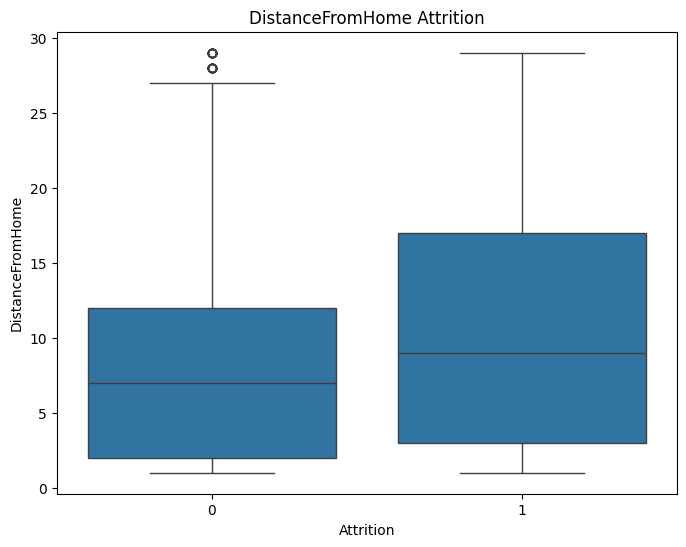

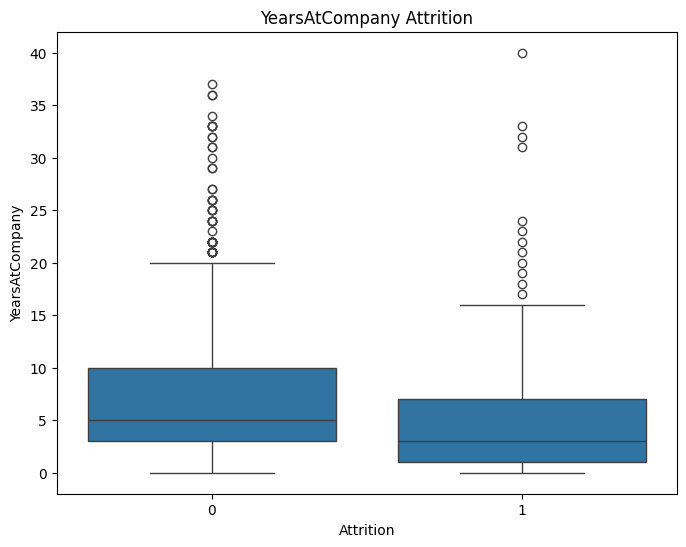

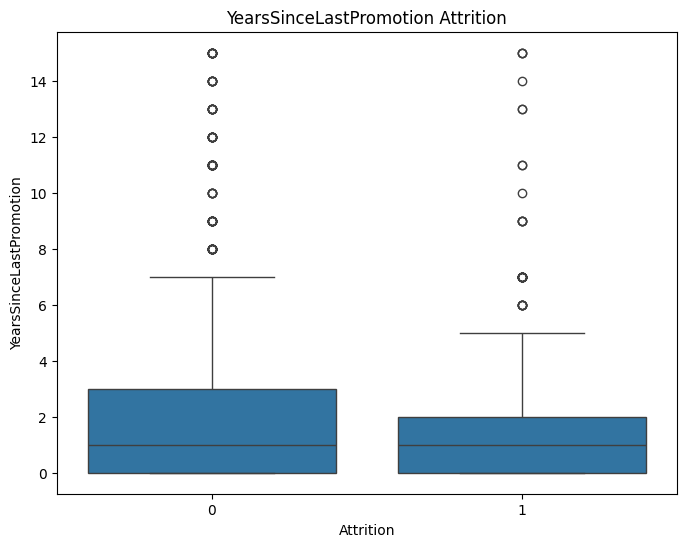

In [ ]:
#attrition vs key numeric values

for col in key:
  plt.figure(figsize= (8, 6))
  sns.boxplot(x= 'Attrition', y= col, data= df)
  plt.title(f'{col} Attrition')
  plt.show()

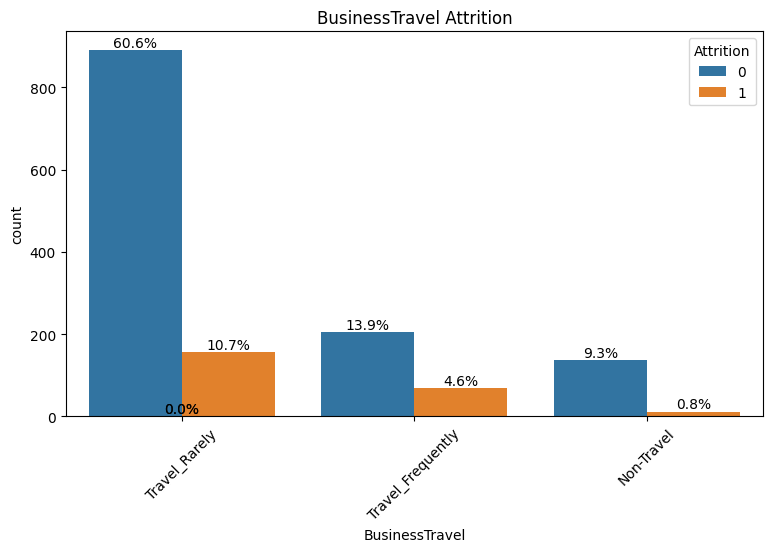

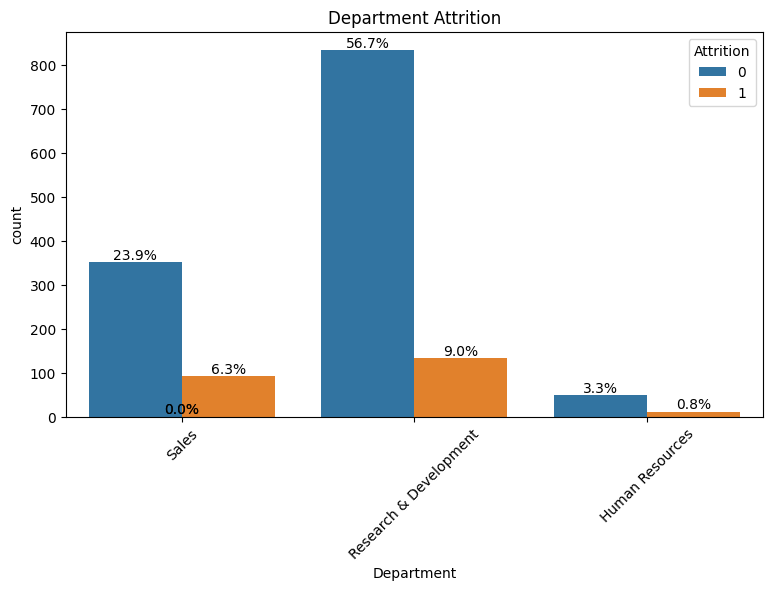

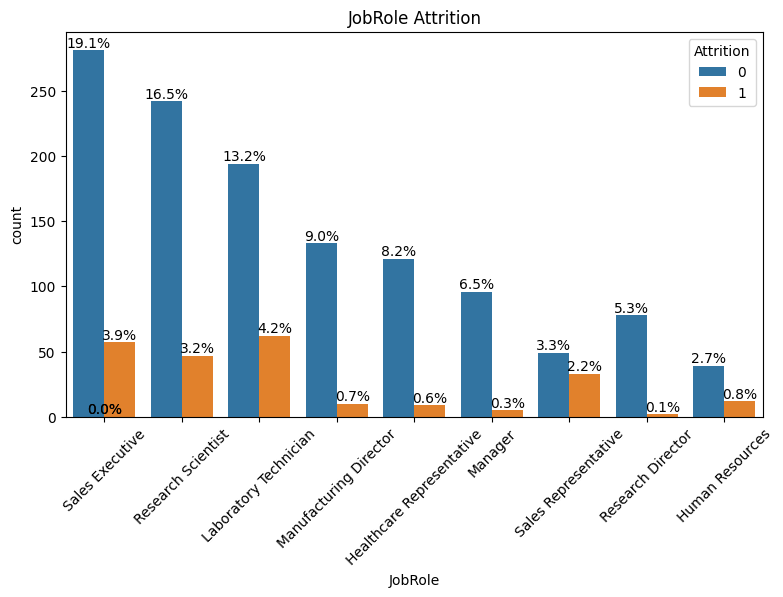

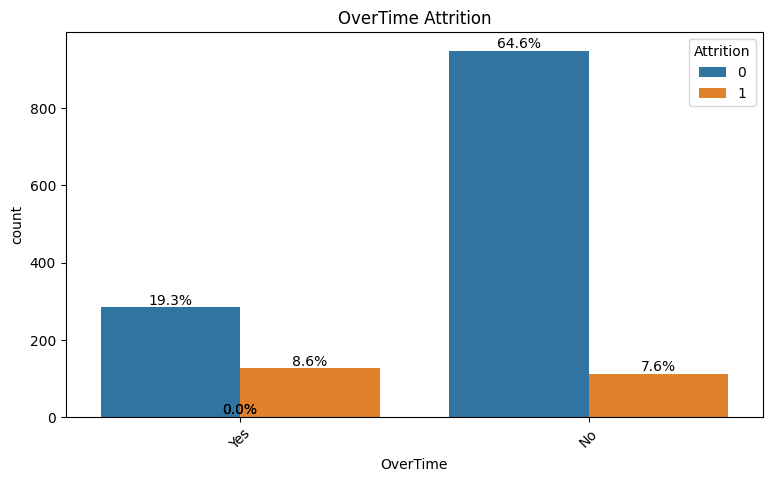

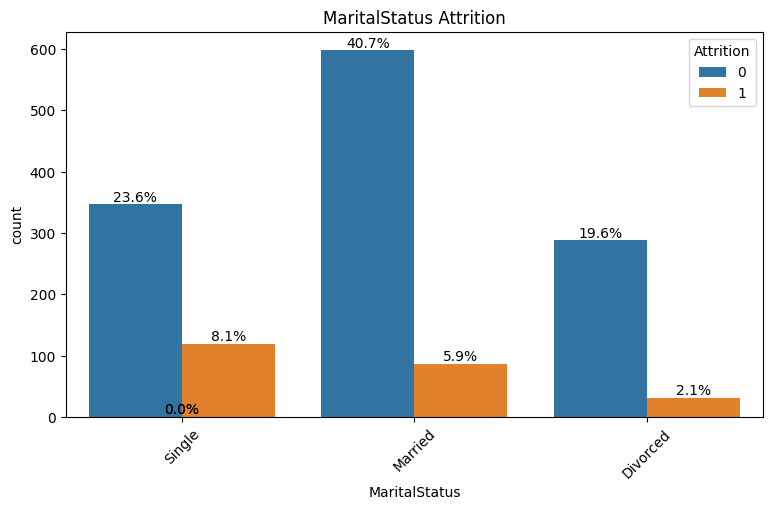

In [ ]:
#key categorical variables

key_kat = ['BusinessTravel', 'Department', 'JobRole', 'OverTime',
           'MaritalStatus']
for col in key_kat:
  plt.figure(figsize= (9, 5))
  pl = sns.countplot(x= col, hue= 'Attrition', data= df)
  [pl.text(p.get_x() + p.get_width()/2,
             p.get_height(),
             f'{p.get_height()/len(df)*100:.1f}%',
             ha='center', va='bottom')
     for p in pl.patches]
  plt.title(f'{col} Attrition')
  plt.xticks(rotation= 45)
  plt.show()

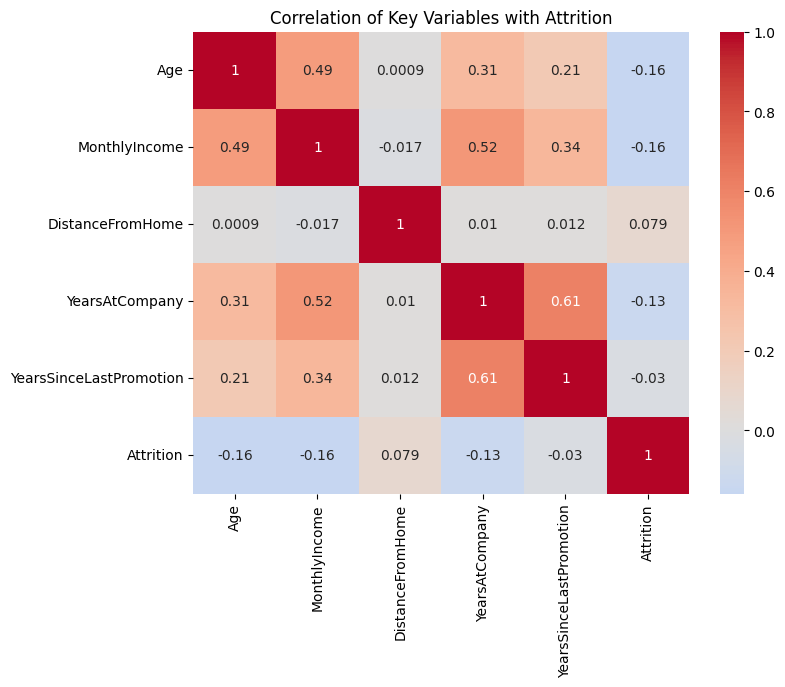

In [ ]:
#correlation heatmap

corr = df[key + ['Attrition']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Key Variables with Attrition")
plt.show()

The results of EDA were imbalanced, as the attrition was unequal to the ratio of only approx 16 percent of the total number of employees. Patterns were part of the highlighting in the visualizations: younger workers, lower wages, and those who had to work overtime, tended to leave the company. There was also increased attrition in business travel and some of the job positions. A correlation heatmap validated that there exists a negative correlation between attrition and age, income and tennure.

#Data Pre-processing and Feature Engineering

In [ ]:
#seperating target & predictors
y = df['Attrition']
x = df.drop('Attrition', axis= 1)

#encoding target to 1/0
le = LabelEncoder()
y = le.fit_transform(y)

#identifying variable types before encoding
num_cols = x.select_dtypes(include = ['int64', 'float64']).columns.tolist()
cat_cols = x.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()

x = pd.get_dummies(x, columns= cat_cols, drop_first= True)

scaler = StandardScaler()
x[num_cols] = scaler.fit_transform(x[num_cols])

Predcitors were seperated. Categorical data are considered as one-hot enocoded, whereas continous data were normalized with the help of StandardScaler. This made all inputs numeric and within a similar scale and thus could be trained using machine learning methods.

#Test Splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42)

#aligning columns in case get_dummies created different sets
x_train, x_test = x_train.align(x_test, join='inner', axis=1, fill_value = 0)

print ('Train Shape', x_train.shape)
print ('Test Shape', x_test.shape)

Train Shape (1029, 47)
Test Shape (441, 47)


The data was divided into training (70) and test (30) sets which were stratified by attrition to maintain class proportions. Each set has 47 features, which are consistent when training and evaluation.

#Training Basline Model (Logistic Regression)

In [ ]:
log_reg = LogisticRegression(max_iter= 1000, class_weight= 'balanced',
                             random_state= 42)
log_reg.fit(x_train, y_train)

y_pred_lr = log_reg.predict(x_test)
y_proba_lr = log_reg.predict_proba(x_test)[:, 1]

print('Accuracy: ', accuracy_score(y_test, y_pred_lr))

Accuracy:  0.7505668934240363


TO overcome the imbalance in attrition, a logistic regression model was trained using equal class weight. It has the accracy of about 75 percent.

#Evaluating Logical Regression

Accuracy: 0.7505668934240363
Precision: 0.3533834586466165
Recall: 0.6619718309859155
F1-score: 0.46078431372549017
ROC-AUC: 0.8066615911686335


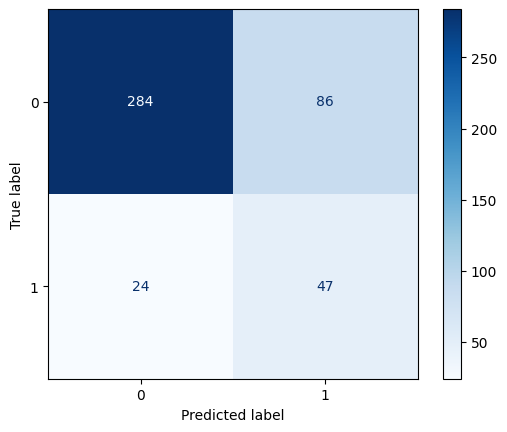

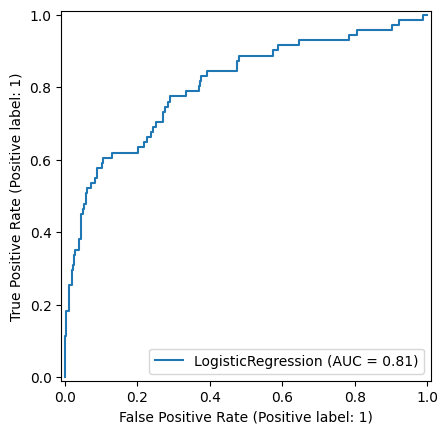

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

#confusion matrix plot
ConfusionMatrixDisplay.from_estimator(log_reg, x_test, y_test, cmap= 'Blues')

#roc curve
RocCurveDisplay.from_estimator(log_reg, x_test, y_test)

It has the accuracy of about 75 percent, preciness of about 0.35 percent, recall of about 0.66 percent, and ROU-AUC of about 0.81 percent. These findings indicate that the model has been successful in identifying employees who are at risk of leaving albeit with some false positives.

#Tree-Based Model (Random Forest)

In [ ]:
rf = RandomForestClassifier(
    n_estimators= 300,
    class_weight= 'balanced',
    random_state= 42
)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:, 1]

print('RF ROC-ROC', roc_auc_score(y_test, y_proba_rf))

RF ROC-ROC 0.7473353635325467


A random forest, 300 estimators, classifier was trained. It has a ROC-AUC of approx 0.75 percent, which is not so high compared to logistic regression. Nonetheless, the analysis of feature importance identified all important predictors of attrition that are overtime, monthly income, age, distance from home, and years of service to the company.

#Plot Feature

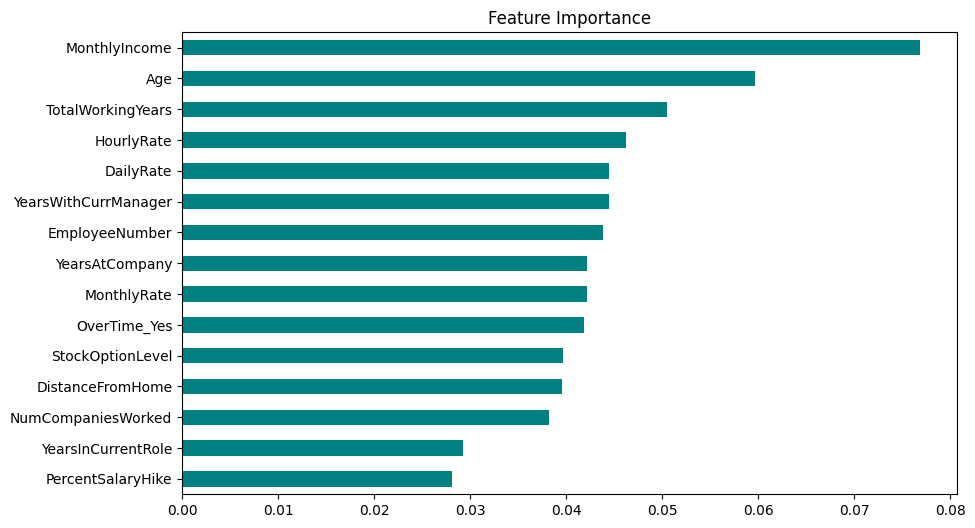

In [ ]:
feat_imp = pd.Series(
    rf.feature_importances_, index= x_train.columns).sort_values(ascending=
                                                                 False)

#plotting
plt.figure(figsize= (10, 6))
feat_imp.head(15).plot(kind= 'barh', color= 'teal')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

The importance of features is represented using horizontal bar chart, and the most influential predictors of attrition are pointed out.

#Conclusion and Recommendations

The models identified the major factors that contribute to attrition: overtime requirements, low salary, youthfulness, long commute, and reduced termination. The quality of the logistic regression was slightly better than random forest and it has interpretability this can be deployed. HR needs to work on overtime, compensation, and career growth to minimize turnover. The model may be used as an early warning system, and in the future, better hyperparameter tuning and the exploration of cutting-edge ensemble techniques may be implemented.